# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*

In [1]:
import numpy as np
from datascience import *

In [2]:
# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Defining Functions

In [3]:
def triple(this_input):
    the_output = 3*this_input
    return the_output

In [4]:
triple(2)

6

In [5]:
#NOTE: Your defined functions can be type-agnostic!!
triple('ha')

'hahaha'

In [6]:
def plus_one(this_input):
    return this_input+1

In [9]:
plus_one(3)

4

In [10]:
def double(x):
    return(x*2)

In [18]:
x = double(4)
x

8

In [15]:
double(5)

10

In [17]:
x

8

# Creating Functions to Customize our Data

Let's take a look at our Math 211 Survey Data that we distributed. 

In [21]:
math211_survey = Table.read_table('Math211_FallSurvey.csv')
math211_survey.show(3)

Timestamp,Surveyor,GPA,introversion/extroversion,Pets,Handed,Sleep Position,K-Pop,K-Pop Group,travel destination,Birthplace,Transfer destination,Fear,Music Genre,Color
8/17/2023 16:33,Christian Le,2.86,6,Dogs,Right-handed,On my side,Yes,Le Sserafim,Japan,Local,UC,Working,Pop,Red
8/17/2023 16:34,Christian Le,4,8,nan,Right-handed,On my back,Yes,Le Sserafim,Switzerland,Local,UC,A regretful life,All,Black
8/17/2023 16:38,Christian Le,2.5,8,Cats,Right-handed,On my stomach,Yes,Seventeen,Hawaii,Local,UC Transfer,"Death, Spiders","R&B, K-POP",Green


One column of data that I found most interesting is the `Travel Destination` column. I think it's nice to read through that column and see what our respondents put down. However, I want to get a sense of **how far away** they are from San Bruno. So I created a table using the following [distance calculator website](https://www.distance.to/San-Bruno,CA,USA) and constructed the following data: 

In [24]:
travel_distances = Table.read_table('Travel_destination_distances.csv')
travel_distances.show()

Travel Destination,Distance (mi)
Amsterdam,5459.31
"Asia, South Korea,Vietnam",6765.77
Asia,6765.77
Bangkok,7926.61
Beach,0
"Beach, Forests",0
Bed,0
Brazil,5447.27
Burma,7678.57
California,148.26


In [40]:
cancun_table = travel_distances.where('Travel Destination','Cancun')
cancun_table.show()
distance_array = cancun_table.column('Distance (mi)')
print(distance_array)
cancun_distance = distance_array.item(0)
cancun_distance

Travel Destination,Distance (mi)
Cancun,2405.18


[ 2405.18]


2405.18

In [41]:
def find_travel_distance(destination):
    destination_table = travel_distances.where('Travel Destination',destination)
    distance_array = destination_table.column('Distance (mi)')
    destination_distance = distance_array.item(0)
    return destination_distance

In [42]:
find_travel_distance('Cancun')

2405.18

In [44]:
math211_survey

Timestamp,Surveyor,GPA,introversion/extroversion,Pets,Handed,Sleep Position,K-Pop,K-Pop Group,travel destination,Birthplace,Transfer destination,Fear,Music Genre,Color
8/17/2023 16:33,Christian Le,2.86,6,Dogs,Right-handed,On my side,Yes,Le Sserafim,Japan,Local,UC,Working,Pop,Red
8/17/2023 16:34,Christian Le,4,8,nan,Right-handed,On my back,Yes,Le Sserafim,Switzerland,Local,UC,A regretful life,All,Black
8/17/2023 16:38,Christian Le,2.5,8,Cats,Right-handed,On my stomach,Yes,Seventeen,Hawaii,Local,UC Transfer,"Death, Spiders","R&B, K-POP",Green
8/17/2023 16:38,Christian Le,3.96,6,Cats,Right-handed,On my side,Yes,STAYC,Costa Rica,Local,UC Grad,Loss of loved ones,"R&B, K-POP",Purple
8/17/2023 16:54,Christian Le,2.98,6,nan,Left-handed,On my side,Yes,New Jeans,Hawaii,Local,nan,Death,R&B,Green
8/17/2023 16:55,Christian Le,3.8,8,Dogs,Right-handed,On my side,Yes,New Jeans,Hawaii,Local,UC,Being alone,R&B,Blue
8/17/2023 17:00,Christian Le,4,3,nan,Right-handed,On my back,No,nan,Japan,California (not Bay Area),CSU,Not being accepted into career program,Hip hop,Khaki
8/17/2023 18:13,Christian Le,4,2,"Cats, Dogs, Reptiles",Both,On my stomach,Yes,New Jeans,Dubai,Local,UC,Insects,Pop,Red
8/17/2023 20:38,Casey So,3.86,3,Dogs,Right-handed,On my back,Yes,Seventeen,Korea,Local,UC,Birds,Pop,Light Blue
8/17/2023 20:43,Casey So,3.2,4,nan,Right-handed,On my side,Yes,Twice,Philippines,Local,UC,Death,Pop,Blue


In [48]:
travel_distance_array = math211_survey.apply(find_travel_distance,'travel destination')
new_survey = math211_survey.with_column('Distance to Dest.',travel_distance_array)
new_survey

Timestamp,Surveyor,GPA,introversion/extroversion,Pets,Handed,Sleep Position,K-Pop,K-Pop Group,travel destination,Birthplace,Transfer destination,Fear,Music Genre,Color,Distance to Dest.
8/17/2023 16:33,Christian Le,2.86,6,Dogs,Right-handed,On my side,Yes,Le Sserafim,Japan,Local,UC,Working,Pop,Red,5142.42
8/17/2023 16:34,Christian Le,4,8,nan,Right-handed,On my back,Yes,Le Sserafim,Switzerland,Local,UC,A regretful life,All,Black,5836.59
8/17/2023 16:38,Christian Le,2.5,8,Cats,Right-handed,On my stomach,Yes,Seventeen,Hawaii,Local,UC Transfer,"Death, Spiders","R&B, K-POP",Green,2344.8
8/17/2023 16:38,Christian Le,3.96,6,Cats,Right-handed,On my side,Yes,STAYC,Costa Rica,Local,UC Grad,Loss of loved ones,"R&B, K-POP",Purple,3076.66
8/17/2023 16:54,Christian Le,2.98,6,nan,Left-handed,On my side,Yes,New Jeans,Hawaii,Local,nan,Death,R&B,Green,2344.8
8/17/2023 16:55,Christian Le,3.8,8,Dogs,Right-handed,On my side,Yes,New Jeans,Hawaii,Local,UC,Being alone,R&B,Blue,2344.8
8/17/2023 17:00,Christian Le,4,3,nan,Right-handed,On my back,No,nan,Japan,California (not Bay Area),CSU,Not being accepted into career program,Hip hop,Khaki,5142.42
8/17/2023 18:13,Christian Le,4,2,"Cats, Dogs, Reptiles",Both,On my stomach,Yes,New Jeans,Dubai,Local,UC,Insects,Pop,Red,8102.07
8/17/2023 20:38,Casey So,3.86,3,Dogs,Right-handed,On my back,Yes,Seventeen,Korea,Local,UC,Birds,Pop,Light Blue,5660.08
8/17/2023 20:43,Casey So,3.2,4,nan,Right-handed,On my side,Yes,Twice,Philippines,Local,UC,Death,Pop,Blue,6999.15


In [54]:
new_survey.select('Surveyor','travel destination','Distance to Dest.','Birthplace ').sort('Distance to Dest.', descending=True).show(10)

Surveyor,travel destination,Distance to Dest.,Birthplace
Kaitlyn W,Singapore,8445.31,out of country
Christian Le,Dubai,8102.07,Local
Thanh Nguyen,Indonesia,7928.19,out of country
Kaitlyn W,Indonesia,7928.19,out of country
Allison,Indonesia,7928.19,out of country
Jackie,Bangkok,7926.61,out of country
Kaitlyn W,Bangkok,7926.61,out of country
Thanh Nguyen,Thailand,7809.68,out of country
Kaitlyn W,Thailand,7809.68,out of country
Kadae,Thailand,7809.68,out of country


# A look into Histograms

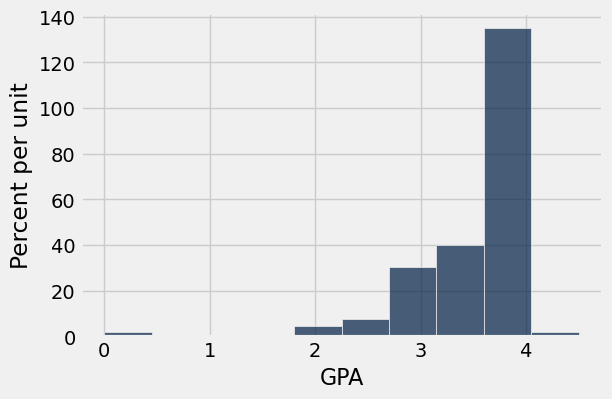

In [62]:
no_outlier = math211_survey.where('GPA',are.below(10))
no_outlier.hist('GPA')

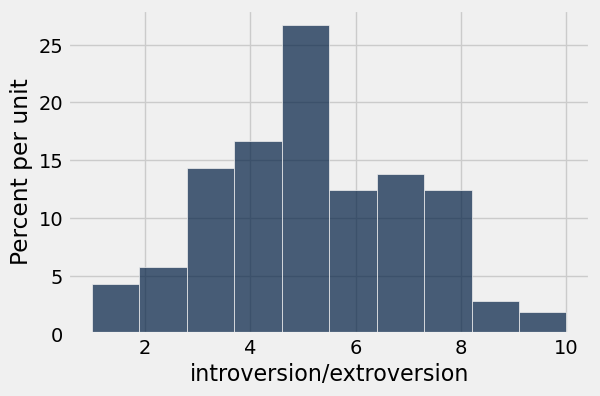

In [58]:
math211_survey.hist('introversion/extroversion')

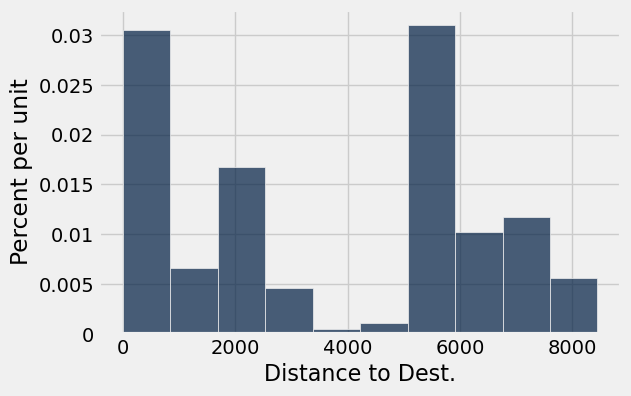

In [59]:
new_survey.hist('Distance to Dest.')